# Comparison of Minao vs MLP model 3.5 (chap)

In [151]:
import sys
sys.path.append("../")
from plt_config import use_latex, TU_GREY, TU_RED
import pickle
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
use_latex()

In [152]:
plot_path = "plot_data/minao_mlp_comp_data.pkl"
with open(plot_path, "rb") as f:
    data = pickle.load(f)
    ground_truth_fock = data["ground_truth_fock"]
    pred_fock = data["pred_fock"]
    minao_guess_fock = data["minao_guess_fock"]
    minao_guess_density = data["minao_guess_density"]
    ground_truth_density = data["ground_truth_density"]
    pred_density_example = data["pred_density"]
    file = data["file"]
    S_test_mol = data["S_test_mol"]
print(f"Using data from file: {file}")

Using data from file: ../../datasets/QM9/xyz_c7h10o2_sorted/dsgdb9nsd_082452.xyz


In [159]:
def plot_mat_comp(reference, prediction, title="Fock Matrix Comparison", ref_title="Reference", pred_title="Prediction", vmax=1.5, filepath=None, titlesize=28, d_ind=None, no_diff=False):

    diff = reference - prediction
    rmse = root_mean_squared_error(reference, prediction)
    print(f"RMSE: {rmse:.8f}")
    if d_ind is not None:
        reference = reference[d_ind[0]:d_ind[1], d_ind[0]:d_ind[1]]
        prediction = prediction[d_ind[0]:d_ind[1], d_ind[0]:d_ind[1]]
        diff = diff[d_ind[0]:d_ind[1], d_ind[0]:d_ind[1]]
    if no_diff:
        fig, ax = plt.subplots(1, 3, figsize=(11, 5), width_ratios=[1, 1, 0.1])
    else:
        fig, ax = plt.subplots(1, 4, figsize=(15, 5), width_ratios=[1, 1, 1, 0.1])
    # fig.suptitle(f"{title}  |  RMSE: {rmse:.8f}")
    
    ref_plot = ax[0].imshow(reference, cmap='RdBu', vmin=-vmax, vmax=vmax)
    ax[0].set_title(ref_title, size=titlesize)
    
    ax[1].imshow(prediction, cmap='RdBu', vmin=-vmax, vmax=vmax)
    ax[1].set_title(pred_title, size=titlesize)
    if not no_diff:
        diff_plot = ax[2].imshow(diff, cmap='RdBu', vmin=-vmax, vmax=vmax)
        ax[2].set_title("Difference", size=titlesize)
        ax[2].set_xticks([])
        ax[2].set_yticks([])    
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    cbar = fig.colorbar(ref_plot, cax=ax[-1])
    pos = ax[-2].get_position()  
    ax[-1].set_position([pos.x1+0.02, pos.y0, 0.02, pos.height])
    # cbar.set_label("Difference Scale", size=titlesize*0.8)
    cbar.set_ticks([-vmax, -vmax/2,  0, vmax/2, vmax])
    
    # plt.tight_layout()
    if filepath:
        plt.savefig(filepath, bbox_inches='tight')
    plt.show()

RMSE: 0.08453477


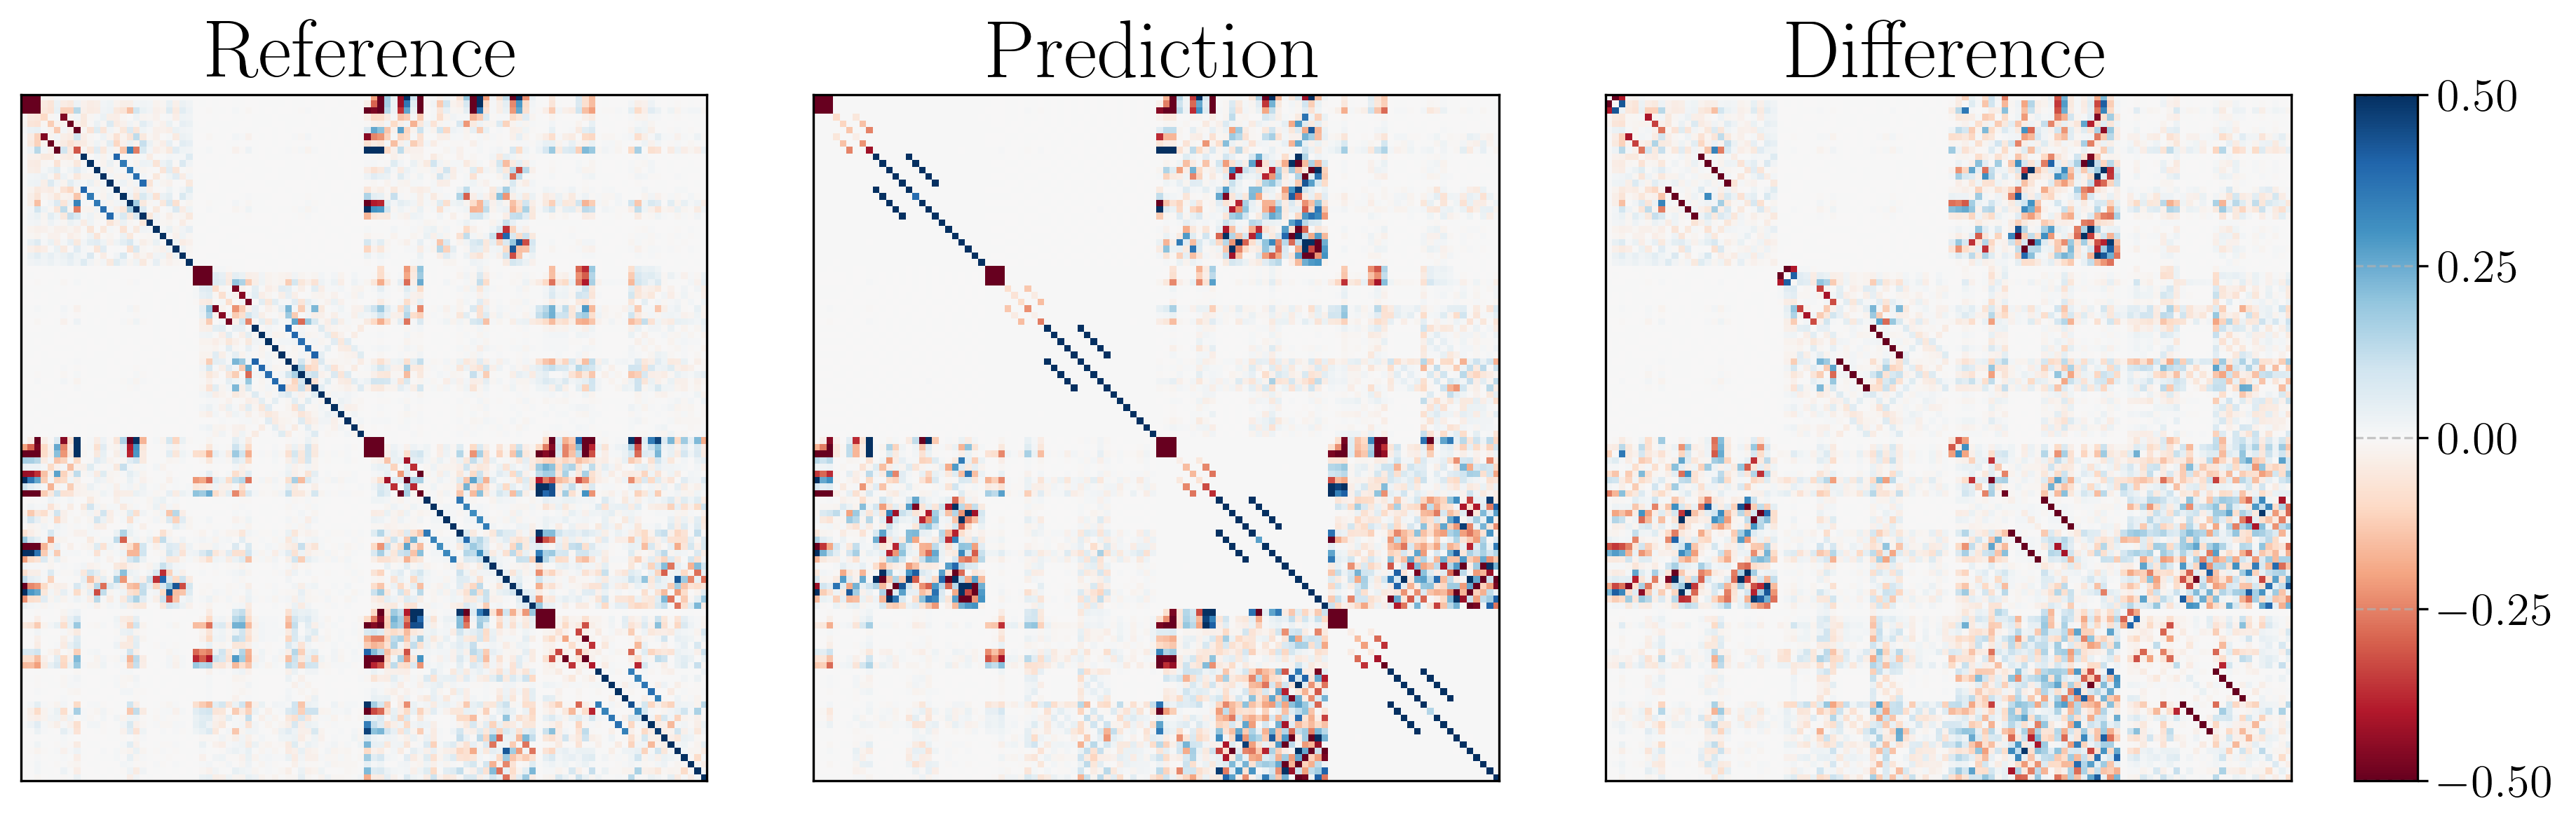

In [160]:
d_ind = (0,26*4)  
plot_mat_comp(reference=ground_truth_fock, prediction=pred_fock, vmax=0.5, d_ind=d_ind, filepath="../../fig/mlp_further_trials/fock_truth_vs_pred.pdf")

RMSE: 0.02940197


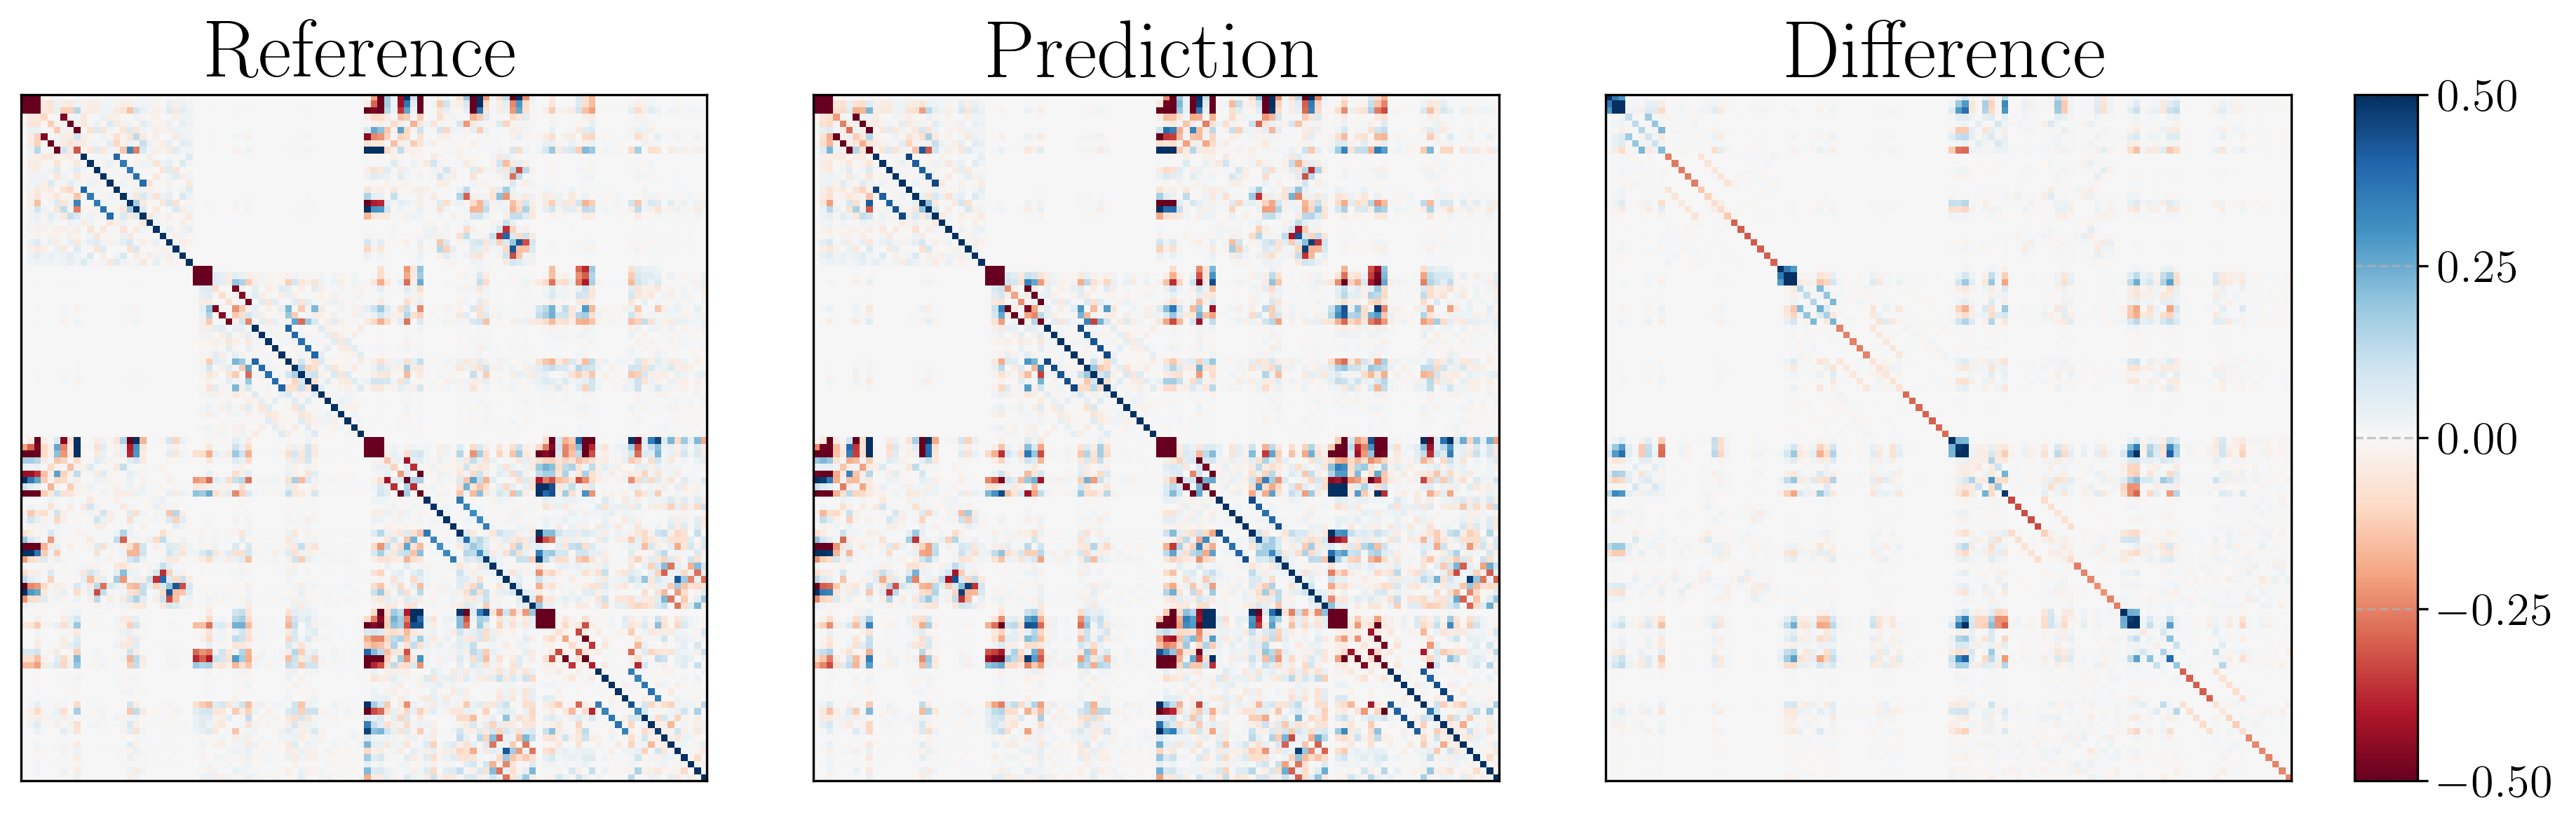

RMSE: 0.46532028


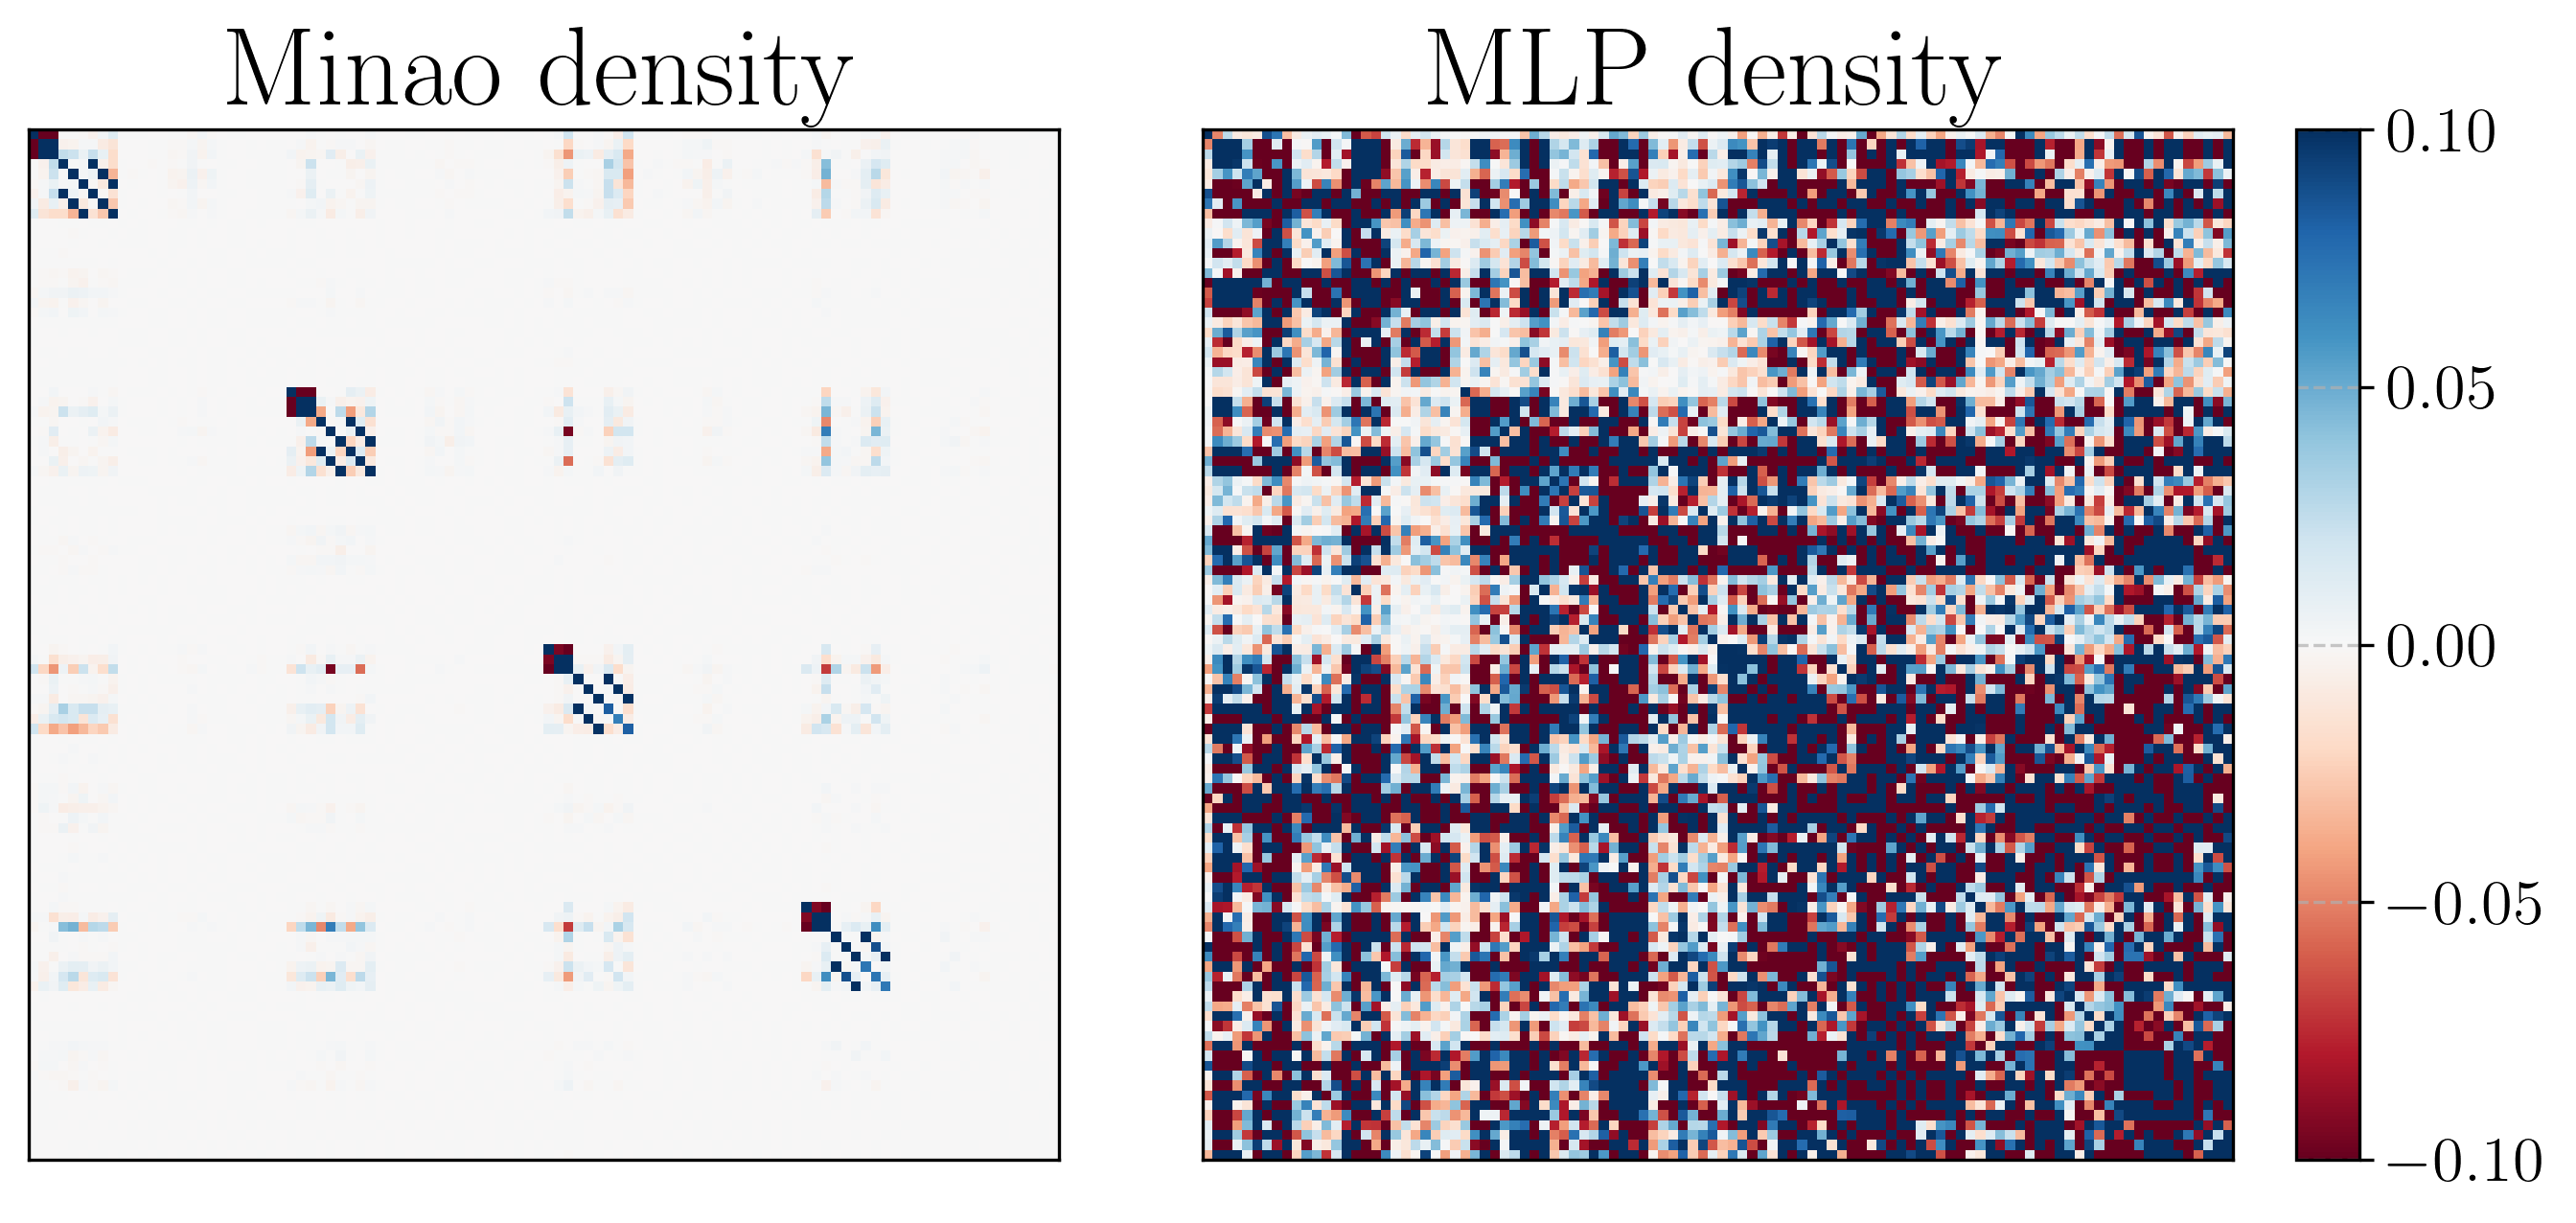

In [161]:
plot_mat_comp(reference=ground_truth_fock, prediction=minao_guess_fock, vmax=0.5, d_ind=d_ind, filepath="../../fig/mlp_further_trials/fock_truth_vs_minao.pdf")
plot_mat_comp(reference=minao_guess_density, prediction=pred_density_example, vmax=0.1, d_ind=d_ind, filepath="../../fig/mlp_further_trials/minao_vs_pred.pdf", ref_title="Minao density", pred_title="MLP density", no_diff=True)
